In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import timeit
import os
import pickle
from load_dc import load_preprocessed_training_batch
import time

<h1>Load training, validation, testing set from your preprocessed files</h1>

In [48]:
# training data is loaded from load_dc
# which contains functions similar to load_cifar
# this is done in the tensorflow session

<h1>Define hyperparameter</h1>

In [49]:
num_epochs = 10
batch_size = 1024
validation = pickle.load(open('dog_cat_training_4.pkl', 'rb'))
val_data = validation['data']
val_labels = validation['labels']
test = pickle.load(open('dog_cat_test.pkl','rb'))
np_test = np.array(test)

<h1>Placeholder</h1>

In [50]:
tf.reset_default_graph()
net_features = tf.placeholder(tf.float32, shape=(None, 227, 227, 3))
net_labels = tf.placeholder(tf.float32, shape=(None, 2))

<h1>AlexNet</h1>

In [51]:
# alexnet consists of 5 convolutional layers 
# the first two are following by overlapping max pool
# the last 3 are not, then 2 fully connected
# relu is used as the activation

conv_1 = tf.layers.conv2d(net_features, filters=96
                          ,kernel_size=11, strides=4,
                         activation=tf.nn.relu)
max_pool_1 = tf.layers.max_pooling2d(conv_1, pool_size=3, strides=2)
padding_1 = tf.constant([[0,0], [2,2], [2,2], [0,0]])
out_1 = tf.pad(max_pool_1, padding_1)
conv_2 = tf.layers.conv2d(out_1, filters=256,
                          kernel_size=5, strides=1, 
                          activation=tf.nn.relu)
max_pool_2 = tf.layers.max_pooling2d(conv_2, pool_size=3,
                                    strides=2)
# one pad, can reuse
padding_2 = tf.constant([[0,0], [1,1], [1,1], [0,0]])
out_2 = tf.pad(max_pool_2, padding_2)
conv_3 = tf.layers.conv2d(out_2, filters=384, kernel_size=3, 
                          strides=1, activation=tf.nn.relu)
out_3 = tf.pad(conv_3, padding_2)
conv_4 = tf.layers.conv2d(out_3, filters=384, 
                          kernel_size=3, strides=1, 
                          activation=tf.nn.relu)
out_4 = tf.pad(conv_4, padding_2)
conv_5 = tf.layers.conv2d(out_4, filters=256, kernel_size=3, 
                          strides=1,activation=tf.nn.relu)
max_pool_3 = tf.layers.max_pooling2d(conv_5, pool_size=3, strides=2)
# not really a conv, but map to fc
conv_6 = tf.layers.conv2d(max_pool_3, filters=4096, 
                          kernel_size=6, strides=1, 
                          activation=tf.nn.relu)
# flatten to fully connected
out_6 = tf.layers.flatten(conv_6)
fc_1 = tf.layers.dense(out_6, units=4096, activation=tf.nn.relu)
fc_2 = tf.layers.dense(fc_1, units=4096, activation=tf.nn.relu)
output = tf.layers.dense(fc_2, units=2)



<h1>Cost and Optimization</h1>

In [52]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=net_labels, logits=output))
opt = tf.train.AdamOptimizer(learning_rate=0.0006)
to_minimize = opt.minimize(cost)

# compare prediction accuracy 
correct_pred = tf.equal(tf.argmax(tf.nn.softmax(output),1),tf.argmax(net_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')


<h1>Training and validation</h1>
<h2>Train your model only 10 epochs</h2>
<p style="font-size:20px">1. Print out training accuracy and validation accuracy each training epoch</p>
<p style="font-size:20px">2. Print out training time each training epoch</p>
<p style="font-size:20px">3. Your goal is to reach 85% validation accuracy in 10 training epochs. If you reach that, you can perform testing, print out your test accuracy. Plot out the ten images with title that contains the probability of the labeled class.</p>

In [53]:
# copy and pasted from previous problem and modified as needed
start = time.time()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        print('Training for Epoch: \t' + str(i))
        start = time.time()
        for batch_num in range(4):
            print('Training for Batch: \t' + str(batch_num))
            training_data = load_preprocessed_training_batch(batch_num, batch_size)
            for data, labels in training_data:
                f_dict = {net_features: data, net_labels: labels}
                sess.run(to_minimize, feed_dict=f_dict)
        print('Current Loss is : \t')
        current_loss = sess.run(cost, feed_dict=f_dict)
        print(current_loss)
        print('Current minibatch train accuracy is: \t')
        current_acc = sess.run(accuracy, feed_dict=f_dict)
        print(current_acc)
        print('Current validation set accuracy is: \t')
        # messed up, will use final training for val
        val_acc = sess.run(accuracy, feed_dict={net_features:val_data[:500], net_labels:val_labels[:500]})
        print(val_acc)
        print('Time for epoch is: \t ' + str(time.time() - start))
    test_pred = sess.run(tf.nn.softmax(output), feed_dict={net_features: np_test[:10], net_labels: np.zeros((10,2))})
    print(test_pred)
end = time.time()
print(end-start)

Training for Epoch: 	0
Training for Batch: 	0
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Current Loss is : 	
0.69029784
Current minibatch train accuracy is: 	
0.5292969
Current validation set accuracy is: 	
0.5
Time for epoch is: 	 25.21447730064392
Training for Epoch: 	1
Training for Batch: 	0
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Current Loss is : 	
0.6947512
Current minibatch train accuracy is: 	
0.47265625
Current validation set accuracy is: 	
0.502
Time for epoch is: 	 23.432941436767578
Training for Epoch: 	2
Training for Batch: 	0
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Current Loss is : 	
0.68396276
Current minibatch train accuracy is: 	
0.57421875
Current validation set accuracy is: 	
0.564
Time for epoch is: 	 23.43167734146118
Training for Epoch: 	3
Training for Batch: 	0
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Current Loss is : 	
0.6961016
Current minibatch tra

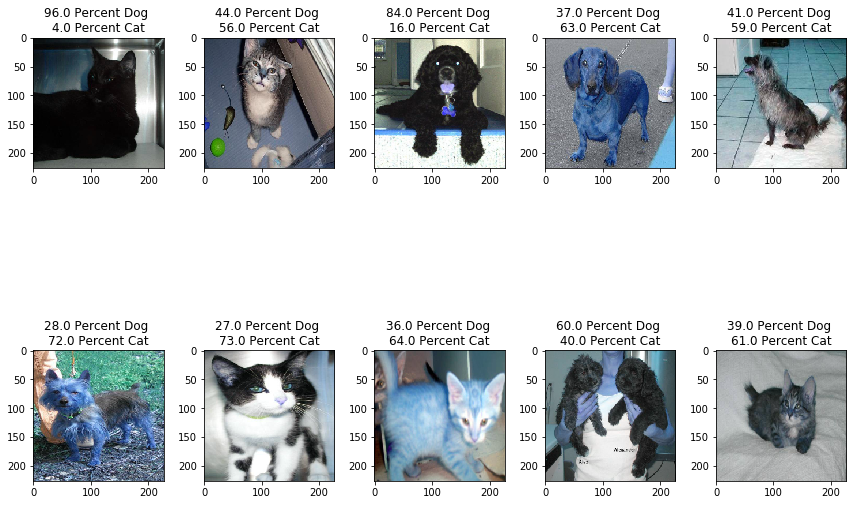

In [61]:
plt.figure(1, figsize=(12,10))

for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np_test[i-1])
    plt.title(str(np.round(test_pred[i-1][0]* 100)) + " Percent Dog \n" + 
             str(np.round(test_pred[i-1][1] * 100)) + " Percent Cat")
plt.tight_layout()

(12000, 227, 227, 3)